# 第二次计算物理作业

学号： 2021300002018

姓名： 朱向阳

# 习题一

**1.6** 人口增长问题通常会产生一阶速率方程。例如，方程

$$
\frac{d N}{d t}=a N-b N^2,\tag{1.13}
$$

可能描述了人口数量$N$随时间的变化。这里的第一项$a N$对应于新成员的出生，而第二项$-b N^2$对应于死亡。死亡项与$N^2$成正比，以考虑到当人口$N$变大时，食物变得更难找到的事实。首先使用欧拉方法解决（1.13），其中$b=0$，并将数值结果与精确解进行比较。然后解决具有非零值$b$的（1.13）。给出对结果的直观解释。有趣的$a$和$b$的值取决于初始人口$N$。对于小的$N(0)$，选择$a=10$和$b=3$是一个不错的选择，而对于$N(0)=1000$，一个好的选择是$a=10$和$b=0.01$。

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# 定义方程的参数
a = 10
b = 3

# 定义时间步长和总时间
dt = 0.02
t_total = 10

# 初始人口数量
N0 = 10
t0 = 0

# 计算步数
num_steps = int(t_total / dt)

# 初始化时间和人口数量数组
t = np.arange(t0, t_total + dt, dt)[:num_steps + 1]
N1, N2, N3 = np.zeros(num_steps+1), np.zeros(num_steps+1), np.zeros(num_steps+1)

# 设置初始值
t[0] = 0
N1[0] = N2[0] = N3[0] = N0

In [85]:
# 欧拉
for i in range(num_steps):
    dN_dt = a * N1[i] - b * N1[i]**2
    N1[i+1] = N1[i] + dt * dN_dt

In [86]:
# 隐式欧拉
for i in range(num_steps):
    dN_dt = a * N2[i] - b * N2[i]**2
    v = N2[i] + dt * dN_dt
    dN_dtv = a * v - b * v**2
    N2[i+1] = N2[i] + dt / 2 * (dN_dt + dN_dtv)

In [87]:
# 改进欧拉
for i in range(num_steps):
    dN_dt1 = a * N3[i] - b * N3[i]**2
    dN_dt2 = a * (N3[i] + dt * dN_dt1) - b * (N3[i] + dt * dN_dt1)**2
    N3[i+1] = N3[i] + dt / 2 * (dN_dt1 + dN_dt2)

In [88]:
# 计算精确解
t_exact = t
N_exact = a * N0 / (b * N0 + (a - b * N0) * np.exp(-a*(t - t0)))

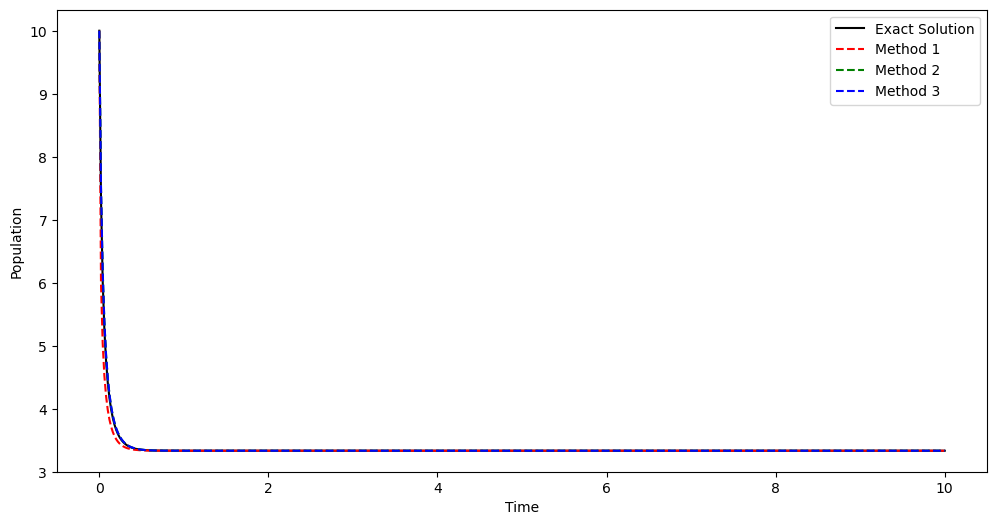

In [89]:
# 绘图比较
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(t, N_exact, 'k-', label='Exact Solution')  
ax.plot(t, N1, 'r--', label='Method 1')  
ax.plot(t, N2, 'g--', label='Method 2')  
ax.plot(t, N3, 'b--', label='Method 3')  

ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()

plt.show()

可以看出，在计算步长较大的情况下，一般欧拉法求解能力最为逊色.

# 习题二

**2.4** 将模型推广到处理山地地形中的运动。陡峭的山坡是指坡度为10％的山坡（即，$\tan \theta=0.1$，其中$\theta$是山坡与水平线的夹角）。计算我们的自行车手在这样的坡上能以多快的速度上下行驶。在这些情况下，比赛策略是否会改变？确定达到$70 \mathrm{mph}$速度所需的条件（坡度陡度和骑手的正面面积）。据报道，职业车手有时在陡坡下达到这样的速度。

要计算在陡峭的山坡上自行车手能以多快的速度上下行驶，我们可以使用以下公式[^1] [^2]：

$$
F_{up} = mg \sin \theta + \mu m g \cos \theta + \frac{1}{2} \rho v^2 (C_d A + F_w)
$$

$$
F_{down} = - mg \sin \theta + \mu m g \cos \theta + \frac{1}{2} \rho v^2 (C_d A + F_w)
$$

上下坡的微分方程分别为：
$$
\dfrac{\mathbf{d}v}{\mathbf{d}t} = \dfrac{\dfrac{P}{v} - F_{up}}{m} = \dfrac{P_{up}}{mv} - (g \sin \theta + \mu  g \cos \theta + \frac{1}{2m} \rho v^2 (C_d A + F_w))
$$

$$
\dfrac{\mathbf{d}v}{\mathbf{d}t} = \dfrac{\dfrac{P}{v} - F_{down}}{m} = \dfrac{P_{down}}{mv} - (- g \sin \theta + \mu  g \cos \theta + \frac{1}{2m} \rho v^2 (C_d A + F_w))
$$

其中：

+ $g$：重力加速度（$m/s^2$）

+ $m$：运动员和车共有质量（$kg$）

+ $\theta$：山坡与水平线的夹角（$rad$）

+ $\mu$：摩擦因数 

+ $\rho$：空气密度（$kg/m^3$）

+ $C_d$：物体的阻力系数 

+ $A$：物体的正面面积（$m^2$）

+ $F_w$：轮辐的增量阻力面积（incremental drag area of the spokes）（$m^2$）

+ $P$：运动员骑车输出功率（$W$）

根据论文[^3] [^4] [^5]：

我们选择的数据为：


+ $g=9.81$

+ $m=150$

+ $\mu=0.0032$

+ $\rho = 1.225$

+ $C_dA=0.473$

+ $F_w=0.0044$

+ $v_0=6$

+ $P_{up} = MMP * m = 8 * 75$
+ $P_{down} = MMP * m = 4 * 75$

[^1]:https://www.sciencedirect.com/science/article/pii/S0167610521001574
[^2]:https://link.springer.com/article/10.1007/s12283-017-0234-1
[^3]:https://link.springer.com/article/10.1007/s12283-021-00345-2
[^4]:https://www.sciencedirect.com/science/article/pii/S1440244022004352
[^5]:https://repository.up.ac.za/handle/2263/42518

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义方程的参数
g = 9.81
rho = 1.225
m = 150
mu = 0.0032
CdA = 0.473 
Fw = 0.0044
Pu = 8 * m
Pd = 4 * m

theta = np.arctan(0.1)
sint = np.sin(theta)
cost = np.cos(theta)

# 定义时间步长和总时间
dt = 0.0001
t_total = 100

# 初始速度
v0 = 6
t0 = 0

# 计算步数
num_steps = int(t_total / dt)

# 初始化时间和速度数组
t = np.arange(t0, t_total + dt, dt)[:num_steps + 1]
vu = np.zeros(num_steps+1)
vd = np.zeros(num_steps+1)

# 设置初始值
t[0] = 0
vu[0] = vd[0] = v0

In [2]:
# 改进欧拉
for i in range(num_steps):
    dvu_1 = Pu/(vu[i]*m) -  g * sint - mu * g * cost - 0.5 * rho * (vu[i] ** 2) * (CdA + Fw) / m
    dvu_2 = Pu/((vu[i] + dt * dvu_1)*m) - g * sint - mu * g * cost - 0.5 * rho * ((vu[i] + dt * dvu_1) ** 2) * (CdA + Fw) / m
    dvd_1 = Pd/(vd[i]*m) + g * sint - mu * g * cost - 0.5 * rho * (vd[i] ** 2) * (CdA + Fw) / m
    dvd_2 = Pd/((vd[i] + dt * dvd_1)*m) + g * sint - mu * g * cost - 0.5 * rho * ((vd[i] + dt * dvd_1) ** 2) * (CdA + Fw) / m

    vu[i+1] = vu[i] + dt / 2 * (dvu_1 + dvu_2)
    vd[i+1] = vd[i] + dt / 2 * (dvd_1 + dvd_2)

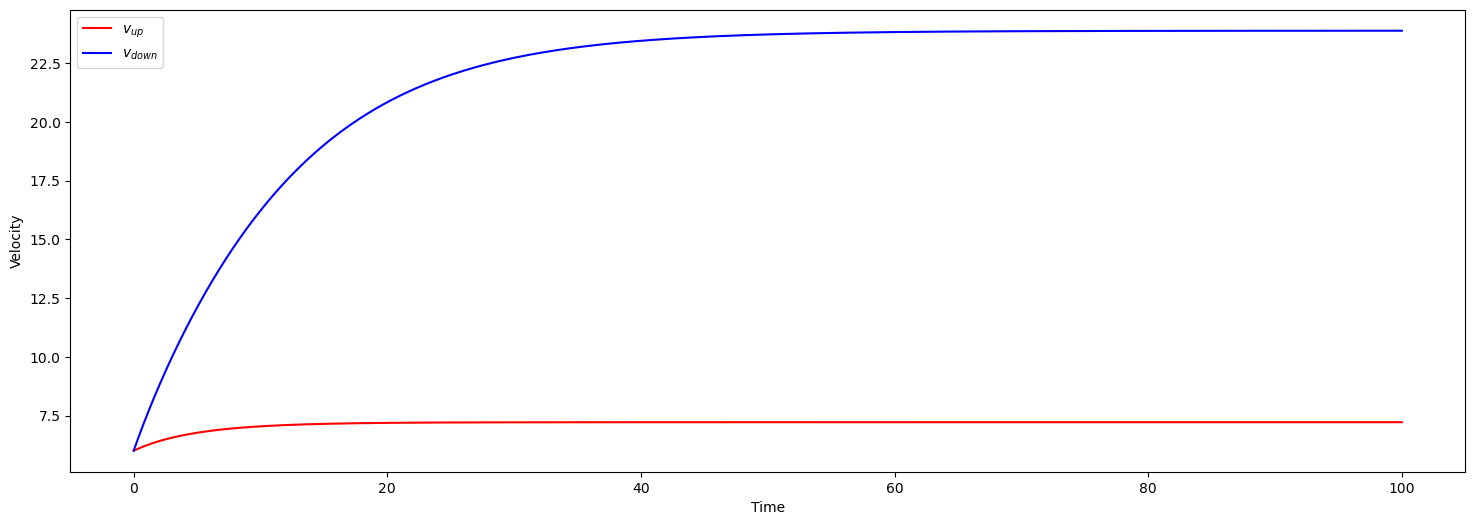

In [3]:
# 绘图比较
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(t, vu, 'r-', label=r'$v_{up}$')  
ax.plot(t, vd, 'b-', label=r'$v_{down}$')  

ax.set_xlabel('Time')
ax.set_ylabel('Velocity')
ax.legend()

plt.show()

若需求得在什么情况下（坡度陡度和骑手的正面面积），车手的速度可以达到$70mph \approx 31.3 m/s$， 我们选择先固定其他变量，同时改变坡度陡度$\theta$和骑手的正面面积$C_dA$，来探究所能达到的最终速度。

注1：当$\dfrac{v_{t + \text{d}t} - v_{t}}{\text{d}t} < eps. \quad(eps = 10^{-2})$时，认为达到了最大速度.

注2：使用改进欧拉法计算，并通过cython优化速度.

In [3]:
%load_ext Cython

## 上面这行一定要运行

In [56]:
import numpy as np
import cython 
# 定义方程的参数
N = 100
g = 9.81
rho = 1.225
m = 150
mu = 0.0032
CdA_min, CdA_max = 0.3, 0.6
CdA = np.linspace(CdA_min, CdA_max, N)
Fw = 0.0044
Pu = 8 * m
Pd = 4 * m

aim = 31.3

theta_min, theta_max = 0.1, 0.5
theta = np.arctan(np.linspace(theta_min, theta_max, N))
sint = np.sin(theta)
cost = np.cos(theta)

vmax = np.zeros((N, N))

# 定义时间步长和总时间
dt = 0.01
t_total = 100
eps = 1e-2

# 初始速度
v0 = 6
t0 = 0

# 计算步数
num_steps = int(t_total / dt)

# 初始化时间和速度数组
t = np.arange(t0, t_total + dt, dt)[:num_steps + 1]
vu = np.zeros(num_steps+1)
vd = np.zeros(num_steps+1)

In [5]:
%%cython -3 

import numpy as np
cimport numpy as cnp
cimport cython

cnp.import_array()

ctypedef cnp.float64_t DTYPE

@cython.boundscheck(False) 
@cython.wraparound(False) 

cpdef cnp.ndarray[DTYPE, ndim=2] ci_py(int N, int num_steps, double g, double rho, double m, double v0,  
                   double mu, double Fw, double Pd, double t0, double dt, double eps, 
                   cnp.ndarray[DTYPE, ndim=1] CdA, cnp.ndarray[DTYPE, ndim=1] sint, 
                   cnp.ndarray[DTYPE, ndim=1] cost, cnp.ndarray[DTYPE, ndim=1] t, 
                   cnp.ndarray[DTYPE, ndim=1] vd, cnp.ndarray[DTYPE, ndim=2] vmax):
    for j in range(N):
        for k in range(N):
            t[0] = t0
            vd[0] = v0
            flag = 0
            for i in range(num_steps):
                dvd_1 = (Pd/(vd[i]) + m * g * sint[k] - m * mu * g * cost[k] - 0.5 * rho * (vd[i] ** 2) * (CdA[j] + Fw))/m
                dvd_2 = (Pd/(vd[i] + dt * dvd_1) + m * g * sint[k] - m * mu * g * cost[k] - 0.5 * rho * ((vd[i] + dt * dvd_1) ** 2) * (CdA[j] + Fw))/m

                vd[i+1] = vd[i] + dt / 2 * (dvd_1 + dvd_2)
                vmax[j][k] = vd[i+1]

                if vd[i+1] - vd[i] < eps:
                    break
    return vmax

In [6]:
reasult = ci_py(N, num_steps, g, rho, m, v0, mu, Fw, Pd, t0, dt, eps,
            CdA, sint, cost, t, vd, vmax)

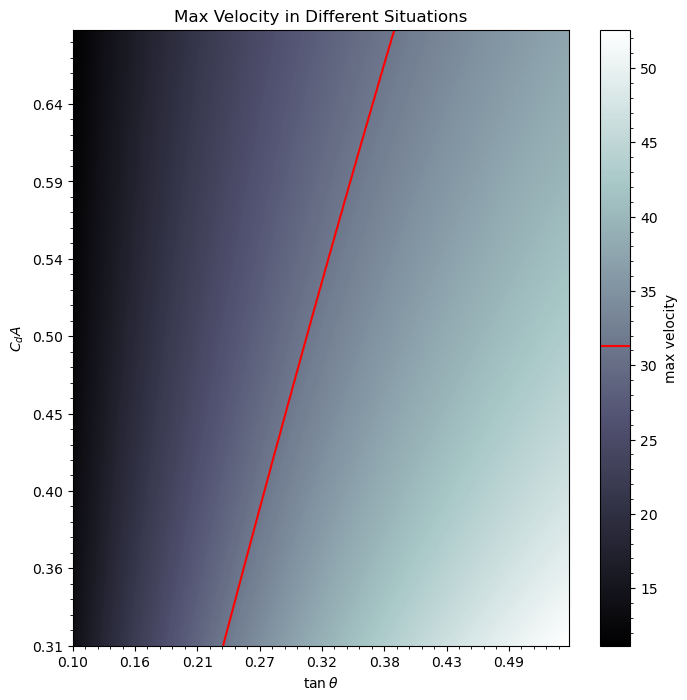

In [91]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 自定义刻度函数
def format_funcx(value, tick_number):
    data_range = np.tan(theta_max) - np.tan(theta_min)
    return '{:.2f}'.format(np.tan(theta_min) + value * data_range / N)

def format_funcy(value, tick_number):
    data_range = np.tan(CdA_max) - np.tan(CdA_min)
    return '{:.2f}'.format(np.tan(CdA_min) + value * data_range / N)

vmax = np.max(reasult)
vmin = np.min(reasult)

fig, ax = plt.subplots(figsize=(8,8))
ticksnum = 1000
plot = ax.contourf(reasult, ticksnum, cmap=plt.cm.bone) # 定义基础imshow

aimtick_index = int(plot.levels.size * (aim - vmin) / (vmax-vmin)) # 计算目标线
ax.set_title('Max Velocity in Different Situations')

ax.set_xlabel(r'$\tan \theta$')
ax.set_ylabel(r'$C_dA$')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_funcx))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_funcy))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) #x,y主副刻度

plotl = ax.contour(plot, levels=plot.levels[aimtick_index:aimtick_index + 1], colors='r') #定义目标线

cbar = fig.colorbar(plot)
cbar.ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
cbar.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
cbar.ax.set_ylim(ymin=vmin, ymax=vmax)
cbar.ax.set_ylabel('max velocity')
cbar.add_lines(plotl) # 定义colorbar